<a href="https://colab.research.google.com/github/soheilpaper/-tft-2.4-ili9341-STM32/blob/master/Pitch_analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install librosa matplotlib numpy scipy

Saving تمامي اين سبك ها تجربي است و جالبه بداني954.mp3 to تمامي اين سبك ها تجربي است و جالبه بداني954.mp3


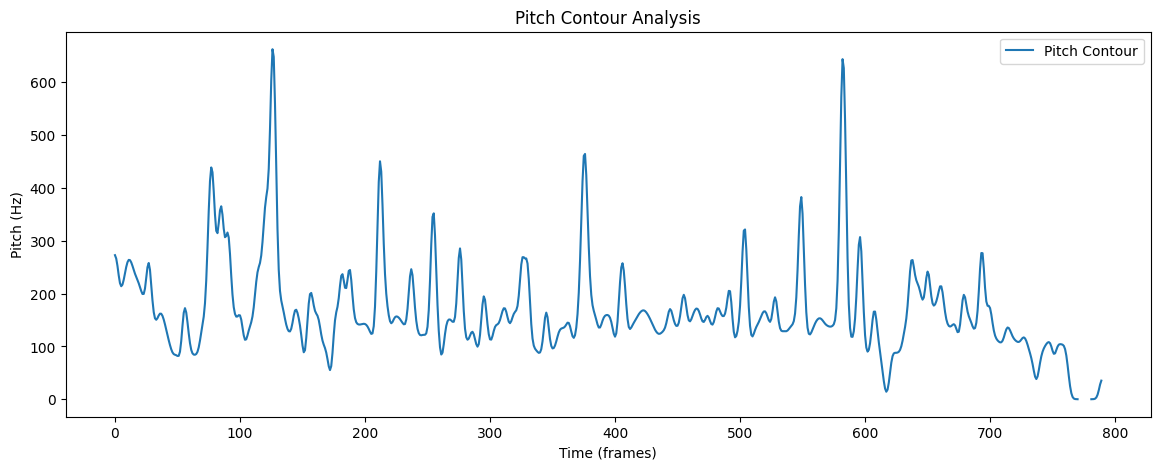

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Function to load an audio file
def load_audio_file(filepath):
    y, sr = librosa.load(filepath, sr=16000)  # Ensures a consistent sample rate
    return y, sr

# Function to extract pitch using librosa
def extract_pitch(y, sr):
    # Extract pitch and magnitude using librosa's piptrack
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, fmin=75, fmax=1000)

    pitch = np.zeros(magnitudes.shape[1])
    for t in range(magnitudes.shape[1]):
        index = magnitudes[:, t].argmax()
        pitch[t] = pitches[index, t]

    # Smooth pitch contour with a Gaussian filter
    pitch = gaussian_filter1d(pitch, sigma=2)

    # Replace zeros with NaN for better plotting
    pitch[pitch == 0] = np.nan

    return pitch

# Function to plot the pitch contour
def plot_pitch_contour(pitch, sr):
    plt.figure(figsize=(14, 5))
    plt.plot(pitch, label='Pitch Contour')
    plt.xlabel('Time (frames)')
    plt.ylabel('Pitch (Hz)')
    plt.title('Pitch Contour Analysis')
    plt.legend()
    plt.show()

# Upload the audio file
from google.colab import files
uploaded = files.upload()

# Load and analyze the audio file
for filename in uploaded.keys():
    y, sr = load_audio_file(filename)
    pitch = extract_pitch(y, sr)
    plot_pitch_contour(pitch, sr)

Saving bakery817.mp3 to bakery817.mp3


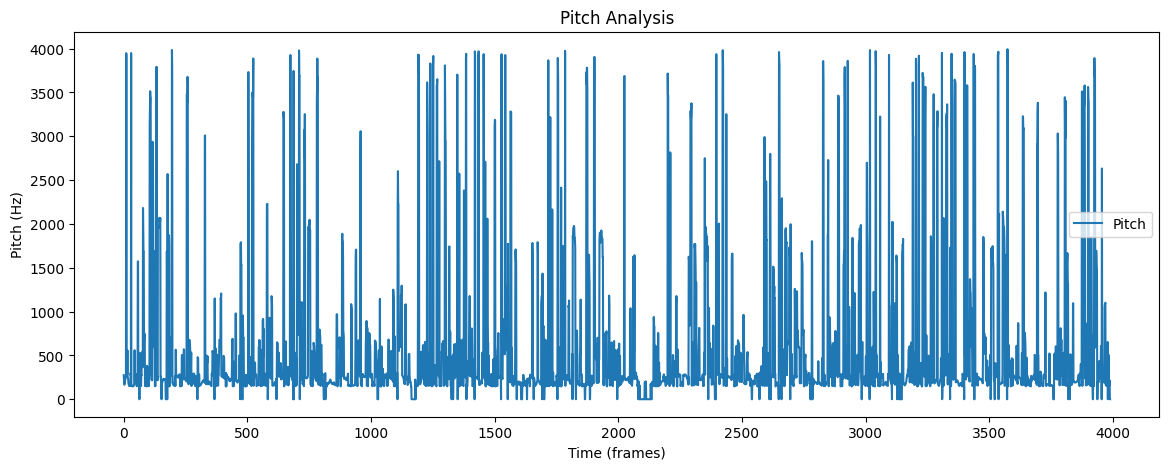

In [ ]:



import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Function to load an audio file
def load_audio_file(filepath):
    y, sr = librosa.load(filepath)
    return y, sr

# Function to perform pitch analysis
def analyze_pitch(y, sr):
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
    pitch = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()
        pitch.append(pitches[index, t])
    pitch = np.array(pitch)
    return pitch

# Function to plot the pitch
def plot_pitch(pitch, sr):
    plt.figure(figsize=(14, 5))
    plt.plot(pitch, label='Pitch')
    plt.xlabel('Time (frames)')
    plt.ylabel('Pitch (Hz)')
    plt.title('Pitch Analysis')
    plt.legend()
    plt.show()

# Upload the audio file
from google.colab import files
uploaded = files.upload()

# Load and analyze the audio file
for filename in uploaded.keys():
    y, sr = load_audio_file(filename)
    pitch = analyze_pitch(y, sr)
    plot_pitch(pitch, sr)